# on top of House hold consumpltion data and cencus data
* Use bagging classiifer and regressor
* extra tree classifier and regressor
* voting classifer and regressor
* random forest classifier and regressor


data link:
* https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
* https://archive.ics.uci.edu/ml/datasets/census+income

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [6]:
data = pd.read_csv("C:/Users/athar/OneDrive/Documents/vsc-files/3rd yr/developer mode/datasets/adult/adult.data",names=
                   ['workclass','fnlwgt','education','edu-num','marital-status','occupation','relationship','race','sex'
                    ,'capital-gain','capital-loss','hrs-per-week','native-country','earnings'])
data.head()

workclass  fnlwgt   education  edu-num       marital-status  \
39          State-gov   77516   Bachelors       13        Never-married   
50   Self-emp-not-inc   83311   Bachelors       13   Married-civ-spouse   
38            Private  215646     HS-grad        9             Divorced   
53            Private  234721        11th        7   Married-civ-spouse   
28            Private  338409   Bachelors       13   Married-civ-spouse   

            occupation    relationship    race      sex  capital-gain  \
39        Adm-clerical   Not-in-family   White     Male          2174   
50     Exec-managerial         Husband   White     Male             0   
38   Handlers-cleaners   Not-in-family   White     Male             0   
53   Handlers-cleaners         Husband   Black     Male             0   
28      Prof-specialty            Wife   Black   Female             0   

    capital-loss  hrs-per-week  native-country earnings  
39             0            40   United-States    <=50K  
50             0            13   United-States    <=50K  
38             0            40   United-States    <=50K  
53             0            40   United-States    <=50K  
28             0            40            Cuba    <=50K

In [7]:
data['age'] = data.index
data.reset_index(drop=True,inplace=True)
data.head()

workclass  fnlwgt   education  edu-num       marital-status  \
0          State-gov   77516   Bachelors       13        Never-married   
1   Self-emp-not-inc   83311   Bachelors       13   Married-civ-spouse   
2            Private  215646     HS-grad        9             Divorced   
3            Private  234721        11th        7   Married-civ-spouse   
4            Private  338409   Bachelors       13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hrs-per-week  native-country earnings  age  
0             0            40   United-States    <=50K   39  
1             0            13   United-States    <=50K   50  
2             0            40   United-States    <=50K   38  
3             0            40   United-States    <=50K   53  
4             0            40            Cuba    <=50K   28

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   edu-num         32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hrs-per-week    32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  earnings        32561 non-null  object
 14  age             32561 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.describe()

fnlwgt       edu-num  capital-gain  capital-loss  hrs-per-week  \
count  3.256100e+04  32561.000000  32561.000000  32561.000000  32561.000000   
mean   1.897784e+05     10.080679   1077.648844     87.303830     40.437456   
std    1.055500e+05      2.572720   7385.292085    402.960219     12.347429   
min    1.228500e+04      1.000000      0.000000      0.000000      1.000000   
25%    1.178270e+05      9.000000      0.000000      0.000000     40.000000   
50%    1.783560e+05     10.000000      0.000000      0.000000     40.000000   
75%    2.370510e+05     12.000000      0.000000      0.000000     45.000000   
max    1.484705e+06     16.000000  99999.000000   4356.000000     99.000000   

                age  
count  32561.000000  
mean      38.581647  
std       13.640433  
min       17.000000  
25%       28.000000  
50%       37.000000  
75%       48.000000  
max       90.000000

In [11]:
data.duplicated().sum()

24

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.isnull().sum()

workclass         0
fnlwgt            0
education         0
edu-num           0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
earnings          0
age               0
dtype: int64

<AxesSubplot:>

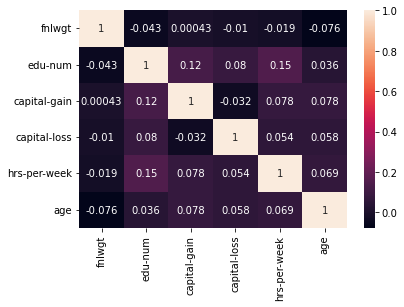

In [16]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

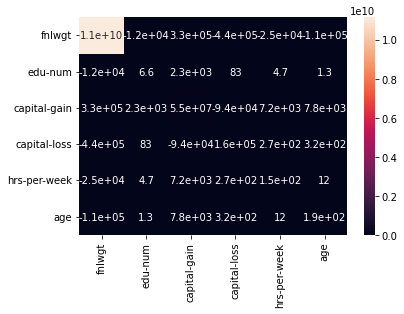

In [18]:
sns.heatmap(data.cov(),annot=True)

In [19]:
data.nunique()

workclass             9
fnlwgt            21648
education            16
edu-num              16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hrs-per-week         94
native-country       42
earnings              2
age                  73
dtype: int64

In [21]:
[data[i].unique() for i in data.columns]

[array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64),
 array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
       dtype=int64),
 array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', '

In [24]:
cat_data = data[[i for i in data.columns if data[i].dtype == 'O']]
num_data = data[[i for i in data.columns if data[i].dtype != 'O']]

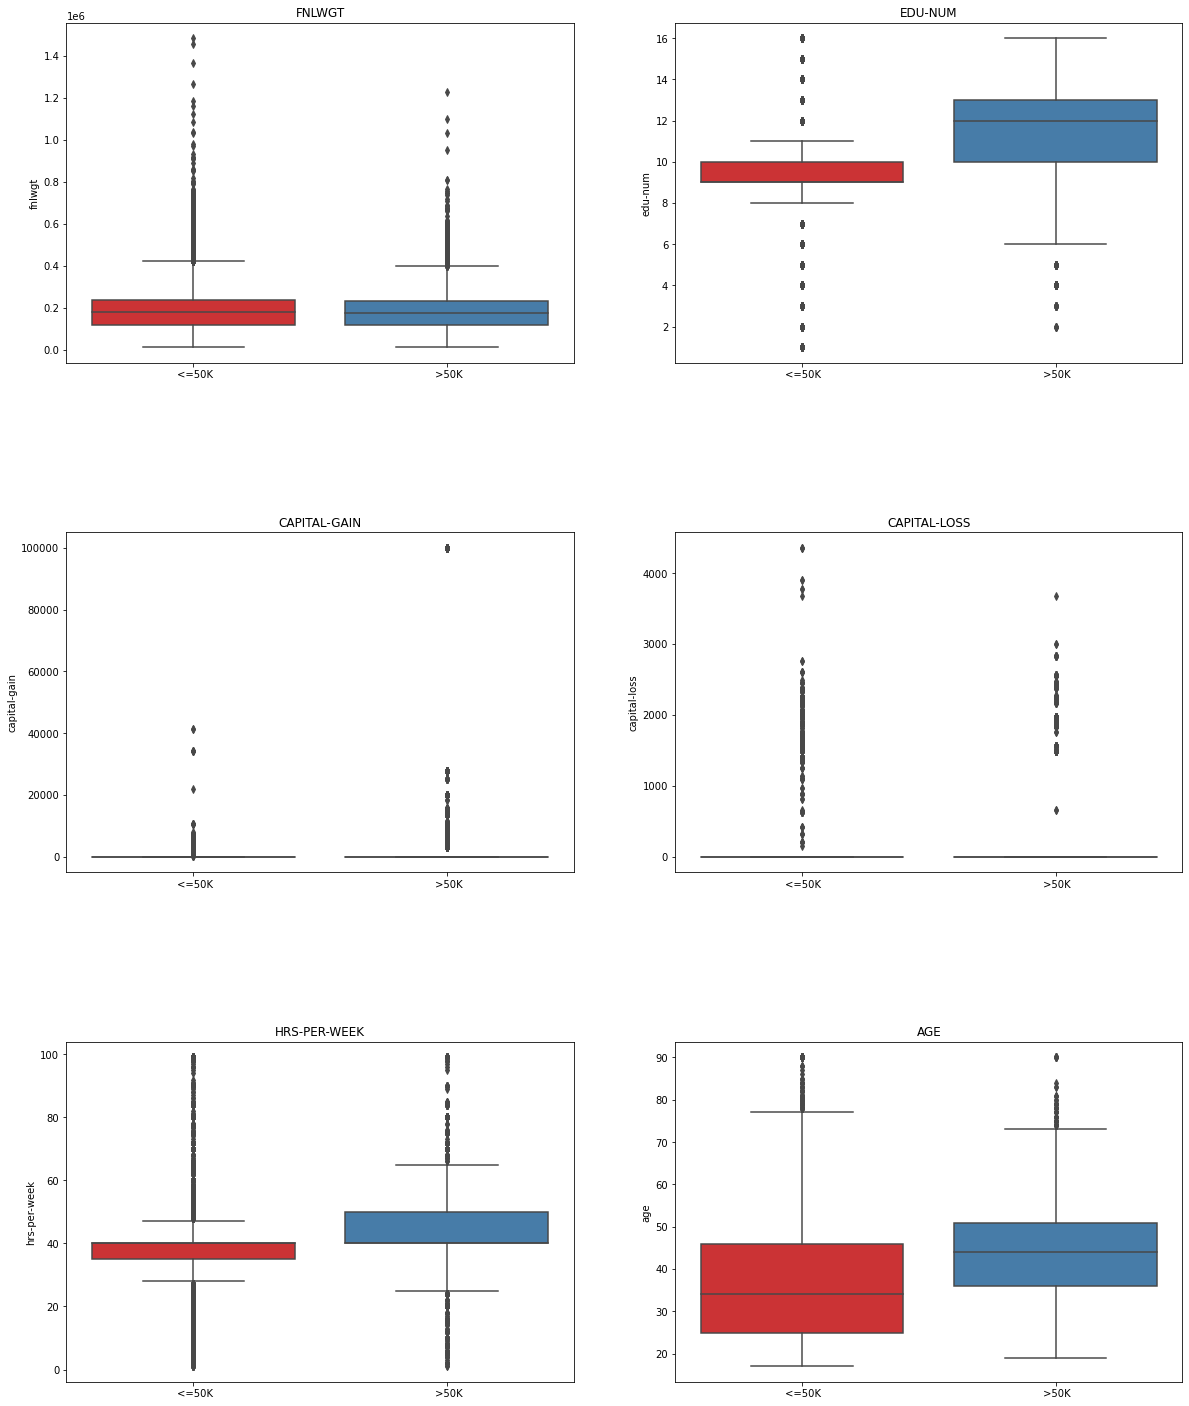

In [25]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,25))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(num_data.columns.to_list(), axs.ravel()):
    sns.boxplot(x='earnings',y=num_data[col],data=data,palette='Set1',ax=ax)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

In [26]:
def tukeys_method(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [27]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data.loc[data["capital-gain"]!=0,:], "capital-gain")
print(probable_outliers_tm,type(probable_outliers_tm),len(probable_outliers_tm))

[99, 110, 122, 129, 136, 146, 152, 155, 166, 182, 192, 198, 235, 261, 268, 280, 323, 362, 365, 383, 389, 412, 428, 438, 453, 464, 493, 500, 510, 538, 560, 587, 599, 618, 620, 622, 625, 637, 690, 692, 714, 721, 723, 760, 764, 797, 807, 850, 868, 881, 894, 904, 905, 947, 989, 995, 997, 1002, 1034, 1035, 1049, 1052, 1075, 1114, 1118, 1122, 1153, 1164, 1176, 1202, 1227, 1246, 1262, 1283, 1292, 1311, 1327, 1333, 1353, 1370, 1426, 1440, 1449, 1450, 1459, 1478, 1480, 1496, 1502, 1507, 1529, 1552, 1569, 1570, 1575, 1603, 1626, 1636, 1646, 1669, 1698, 1730, 1747, 1770, 1807, 1823, 1824, 1827, 1828, 1869, 1870, 1889, 1928, 1949, 1977, 1979, 1985, 1992, 2004, 2019, 2021, 2038, 2050, 2054, 2064, 2075, 2090, 2113, 2135, 2138, 2159, 2179, 2203, 2206, 2216, 2231, 2252, 2271, 2281, 2287, 2304, 2305, 2337, 2351, 2359, 2362, 2363, 2365, 2472, 2494, 2531, 2551, 2589, 2606, 2664, 2669, 2681, 2693, 2708] <class 'list'> 159


In [28]:
# outlier data
data.iloc[probable_outliers_tm]

workclass  fnlwgt      education  edu-num       marital-status  \
99          Federal-gov  249409        HS-grad        9        Never-married   
110             Private  432376      Bachelors       13        Never-married   
122             Private   77143      Bachelors       13        Never-married   
129             Private  365739   Some-college       10             Divorced   
136    Self-emp-not-inc   56920        HS-grad        9   Married-civ-spouse   
...                 ...     ...            ...      ...                  ...   
2664            Private  163215      Bachelors       13             Divorced   
2669            Private   23074   Some-college       10              Widowed   
2681            Private  255364   Some-college       10   Married-civ-spouse   
2693            Private  145964      Bachelors       13        Never-married   
2708            Private  189763        HS-grad        9             Divorced   

            occupation     relationship    race      sex  capital-gain  \
99       Other-service        Own-child   Black     Male             0   
110              Sales   Other-relative   White     Male             0   
122    Exec-managerial        Own-child   Black     Male             0   
129       Craft-repair    Not-in-family   White     Male             0   
136       Craft-repair          Husband   White     Male             0   
...                ...              ...     ...      ...           ...   
2664   Exec-managerial    Not-in-family   White   Female         10520   
2669   Exec-managerial    Not-in-family   White   Female             0   
2681    Prof-specialty          Husband   White     Male             0   
2693   Exec-managerial    Not-in-family   White     Male             0   
2708             Sales    Not-in-family   White   Female             0   

      capital-loss  hrs-per-week  native-country earnings  age  
99               0            40   United-States    <=50K   32  
110              0            40   United-States    <=50K   24  
122              0            40         Germany    <=50K   30  
129              0            40   United-States    <=50K   39  
136              0            60   United-States    <=50K   43  
...            ...           ...             ...      ...  ...  
2664             0            40   United-States     >50K   40  
2669             0            40   United-States     >50K   49  
2681             0            40   United-States    <=50K   55  
2693             0            40   United-States    <=50K   24  
2708             0            30   United-States    <=50K   46  

[159 rows x 15 columns]

In [29]:

l1 = data.index.to_list()
for i in probable_outliers_tm:
    l1.remove(i)

In [34]:
df_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
df_gain_withoutzero.head()

workclass  fnlwgt   education  edu-num       marital-status  \
0    State-gov   77516   Bachelors       13        Never-married   
8      Private   45781     Masters       14        Never-married   
9      Private  159449   Bachelors       13   Married-civ-spouse   
59     Private  188146     HS-grad        9   Married-civ-spouse   
60     Private   59496   Bachelors       13   Married-civ-spouse   

            occupation    relationship    race      sex  capital-gain  \
0         Adm-clerical   Not-in-family   White     Male          2174   
8       Prof-specialty   Not-in-family   White   Female         14084   
9      Exec-managerial         Husband   White     Male          5178   
59   Machine-op-inspct         Husband   White     Male          5013   
60               Sales         Husband   White     Male          2407   

    capital-loss  hrs-per-week  native-country earnings  age  
0              0            40   United-States    <=50K   39  
8              0            50   United-States     >50K   31  
9              0            40   United-States     >50K   42  
59             0            40   United-States    <=50K   30  
60             0            40   United-States    <=50K   30

In [36]:
df_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
df_loss_withoutzero.head()

workclass  fnlwgt     education  edu-num       marital-status  \
23            Private  117037          11th        7   Married-civ-spouse   
32            Private  386940     Bachelors       13             Divorced   
52            Private   51835   Prof-school       15   Married-civ-spouse   
93            Private  117747       HS-grad        9   Married-civ-spouse   
96   Self-emp-not-inc  191277     Doctorate       16   Married-civ-spouse   

           occupation relationship                 race      sex  \
23   Transport-moving      Husband                White     Male   
32    Exec-managerial    Own-child                White     Male   
52     Prof-specialty         Wife                White   Female   
93              Sales         Wife   Asian-Pac-Islander   Female   
96     Prof-specialty      Husband                White     Male   

    capital-gain  capital-loss  hrs-per-week  native-country earnings  age  
23             0          2042            40   United-States    <=50K   43  
32             0          1408            40   United-States    <=50K   45  
52             0          1902            60        Honduras     >50K   47  
93             0          1573            35               ?    <=50K   30  
96             0          1902            60   United-States     >50K   48

In [37]:
from scipy import stats
def outlier_index_zscore(data):
    z = np.abs(stats.zscore(data))
    return np.where(z > 3)
outlier_indexes = np.concatenate([outlier_index_zscore(df_gain_withoutzero['capital-gain'])[0],outlier_index_zscore(df_loss_withoutzero['capital-loss'])[0]])

In [38]:
trimmed_df = data.loc[set(data.index) - set(outlier_indexes)]
trimmed_df.shape

(32342, 15)

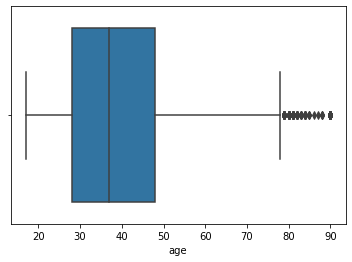

In [39]:
# age box-plot

sns.boxplot(x='age',data=data)
plt.show()

In [40]:
age_outlier = outlier_index_zscore(trimmed_df['age'])
len(age_outlier[0])

119

In [41]:
# remove age outlier

trimmed_df = data.loc[set(trimmed_df.index) - set(age_outlier[0])]

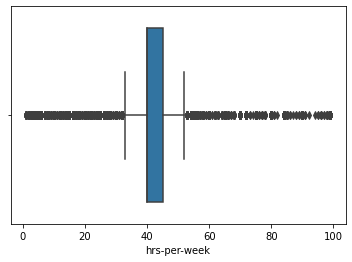

In [42]:

# age box-plot

sns.boxplot(x='hrs-per-week',data=data)
plt.show()

In [43]:
hrs_per_week = outlier_index_zscore(data['hrs-per-week'])

In [44]:

len(hrs_per_week[0])

440

In [45]:
# remove hrs-per-week outlier

trimmed_df = data.loc[set(trimmed_df.index) - set(hrs_per_week[0])]

In [46]:
trimmed_df.shape

(31788, 15)

In [48]:
cat = [i for i in data.columns if data[i].dtype == 'O']
num = [i for i in data.columns if data[i].dtype != 'O']

In [49]:
trimmed_df[cat].describe().T

count unique                  top   freq
workclass       31788      9              Private  22167
education       31788     16              HS-grad  10251
marital-status  31788      7   Married-civ-spouse  14642
occupation      31788     15       Prof-specialty   4024
relationship    31788      6              Husband  12891
race            31788      5                White  27168
sex             31788      2                 Male  21262
native-country  31788     42        United-States  28481
earnings        31788      2                <=50K  24132

In [50]:
trimmed_df.earnings = trimmed_df.earnings.str.strip()

In [51]:
trimmed_df.earnings.unique()

array(['<=50K', '>50K'], dtype=object)

In [52]:
# Label Encode Target Feature

trimmed_df.earnings = trimmed_df.earnings.map({'<=50K':0, '>50K':1})

In [53]:
trimmed_df.earnings.value_counts()

0    24132
1     7656
Name: earnings, dtype: int64

In [54]:
trimmed_df.groupby('sex')['earnings'].sum()

sex
 Female    1155
 Male      6501
Name: earnings, dtype: int64

In [55]:
trimmed_df.describe()

fnlwgt       edu-num  capital-gain  capital-loss  hrs-per-week  \
count  3.178800e+04  31788.000000  31788.000000  31788.000000  31788.000000   
mean   1.897089e+05     10.078929   1081.284478     86.985089     40.384642   
std    1.054638e+05      2.570484   7400.887213    402.394264     12.223377   
min    1.228500e+04      1.000000      0.000000      0.000000      1.000000   
25%    1.178242e+05      9.000000      0.000000      0.000000     40.000000   
50%    1.783240e+05     10.000000      0.000000      0.000000     40.000000   
75%    2.368782e+05     12.000000      0.000000      0.000000     45.000000   
max    1.484705e+06     16.000000  99999.000000   4356.000000     99.000000   

           earnings           age  
count  31788.000000  31788.000000  
mean       0.240846     38.589971  
std        0.427603     13.636364  
min        0.000000     17.000000  
25%        0.000000     28.000000  
50%        0.000000     37.000000  
75%        0.000000     48.000000  
max        1.000000     90.000000

In [56]:
data.describe()

fnlwgt       edu-num  capital-gain  capital-loss  hrs-per-week  \
count  3.253700e+04  32537.000000  32537.000000  32537.000000  32537.000000   
mean   1.897808e+05     10.081815   1078.443741     87.368227     40.440329   
std    1.055565e+05      2.571633   7387.957424    403.101833     12.346889   
min    1.228500e+04      1.000000      0.000000      0.000000      1.000000   
25%    1.178270e+05      9.000000      0.000000      0.000000     40.000000   
50%    1.783560e+05     10.000000      0.000000      0.000000     40.000000   
75%    2.369930e+05     12.000000      0.000000      0.000000     45.000000   
max    1.484705e+06     16.000000  99999.000000   4356.000000     99.000000   

                age  
count  32537.000000  
mean      38.585549  
std       13.637984  
min       17.000000  
25%       28.000000  
50%       37.000000  
75%       48.000000  
max       90.000000

In [57]:
trimmed_df

workclass  fnlwgt    education  edu-num       marital-status  \
0              State-gov   77516    Bachelors       13        Never-married   
1       Self-emp-not-inc   83311    Bachelors       13   Married-civ-spouse   
2                Private  215646      HS-grad        9             Divorced   
3                Private  234721         11th        7   Married-civ-spouse   
4                Private  338409    Bachelors       13   Married-civ-spouse   
...                  ...     ...          ...      ...                  ...   
32556            Private  257302   Assoc-acdm       12   Married-civ-spouse   
32557            Private  154374      HS-grad        9   Married-civ-spouse   
32558            Private  151910      HS-grad        9              Widowed   
32559            Private  201490      HS-grad        9        Never-married   
32560       Self-emp-inc  287927      HS-grad        9   Married-civ-spouse   

               occupation    relationship    race      sex  capital-gain  \
0            Adm-clerical   Not-in-family   White     Male          2174   
1         Exec-managerial         Husband   White     Male             0   
2       Handlers-cleaners   Not-in-family   White     Male             0   
3       Handlers-cleaners         Husband   Black     Male             0   
4          Prof-specialty            Wife   Black   Female             0   
...                   ...             ...     ...      ...           ...   
32556        Tech-support            Wife   White   Female             0   
32557   Machine-op-inspct         Husband   White     Male             0   
32558        Adm-clerical       Unmarried   White   Female             0   
32559        Adm-clerical       Own-child   White     Male             0   
32560     Exec-managerial            Wife   White   Female         15024   

       capital-loss  hrs-per-week  native-country  earnings  age  
0                 0            40   United-States         0   39  
1                 0            13   United-States         0   50  
2                 0            40   United-States         0   38  
3                 0            40   United-States         0   53  
4                 0            40            Cuba         0   28  
...             ...           ...             ...       ...  ...  
32556             0            38   United-States         0   27  
32557             0            40   United-States         1   40  
32558             0            40   United-States         0   58  
32559             0            20   United-States         0   22  
32560             0            40   United-States         1   52  

[31788 rows x 15 columns]

In [58]:
import os
os.makedirs('trimmed_df')
trimmed_df.to_csv('./trimmed_df/census.csv')